Ejemplo ePy_docs + ePy_units

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ePy_units.converter import UnitConverter
converter = UnitConverter("structural")

from ePy_docs.writers import DocumentWriter
writer = DocumentWriter("paper", "professional")

In [2]:
writer.add_h1("Conversor de tablas en formato dataframe")

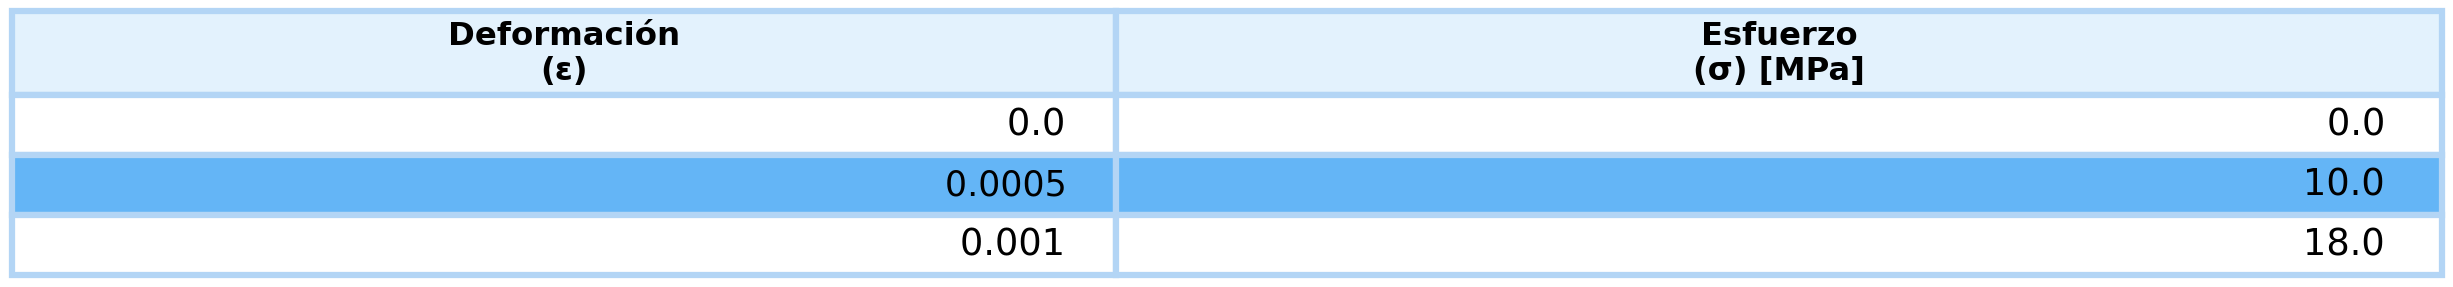

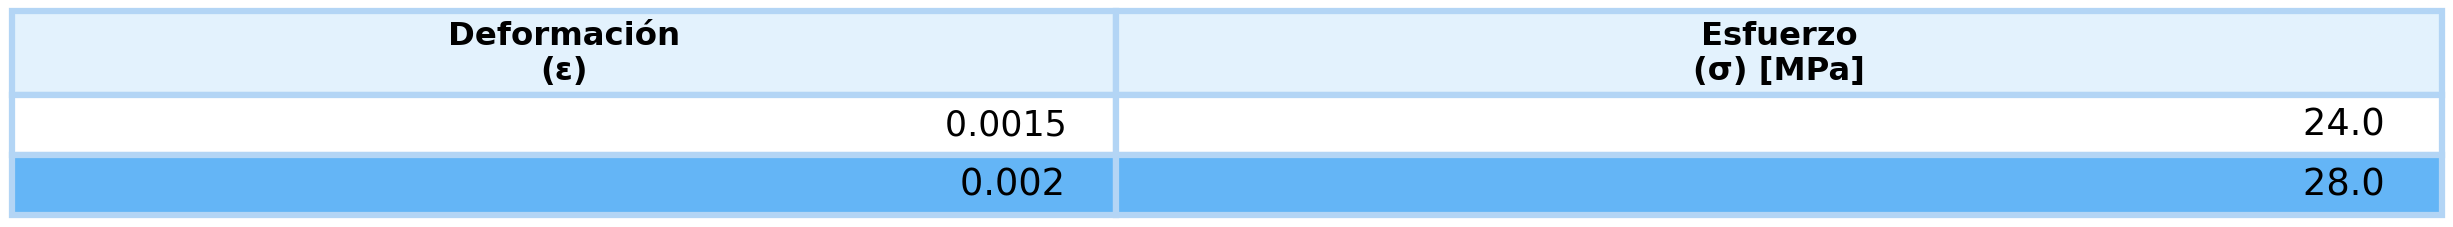

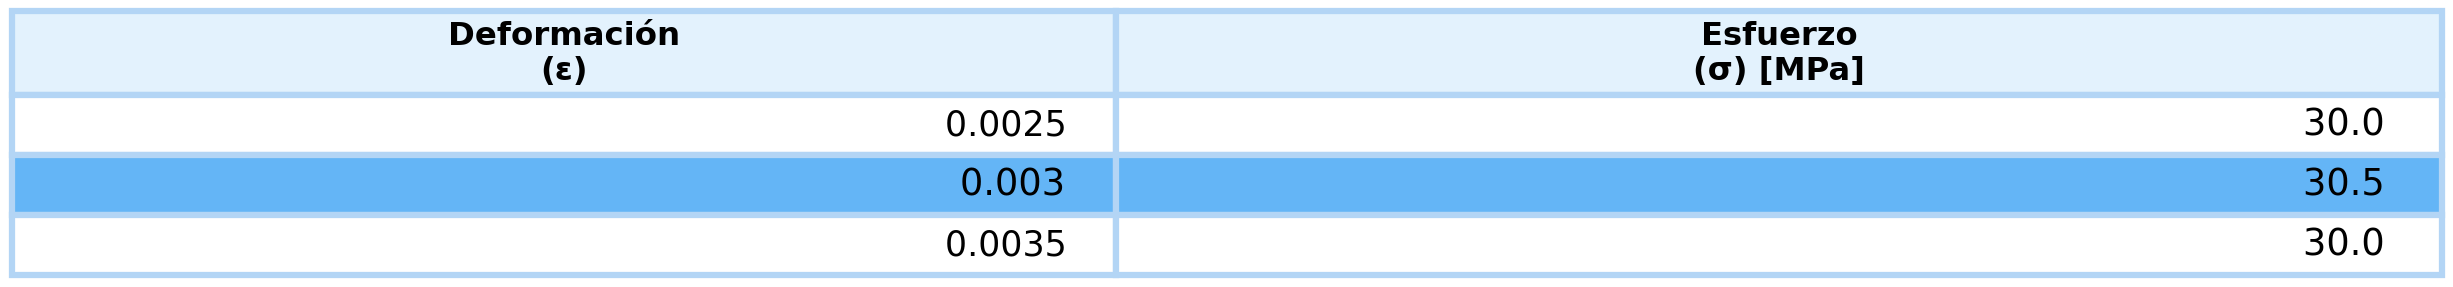

In [3]:
# Crear datos de diagrama esfuerzo-deformación
# Datos típicos de concreto en compresión
strain = np.array([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035])
stress = np.array([0, 10, 18, 24, 28, 30, 30.5, 30])  # MPa

df_stress_strain = pd.DataFrame({
    'Deformación (ε)': strain,
    'Esfuerzo (σ) [MPa]': stress
})

writer.add_table(df_stress_strain,title="Tabla original" , show_figure=True, max_rows_per_table = [3, 2, 25, 10])

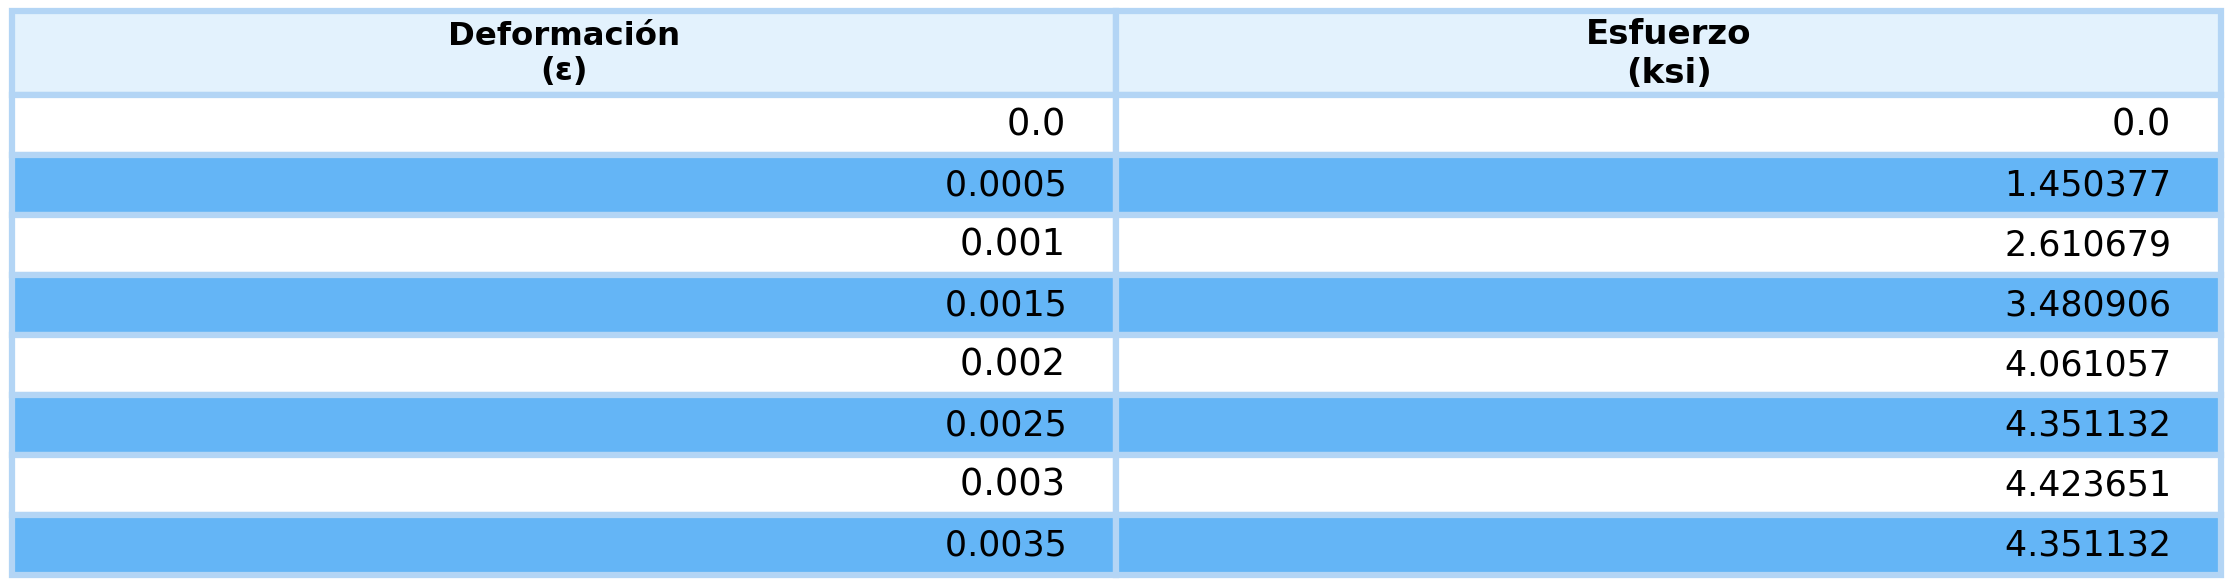

In [4]:
converted_df_stress_strain = converter.convert_table(df_stress_strain, target_system = "Imperial")
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a Imperial" , show_figure=True)

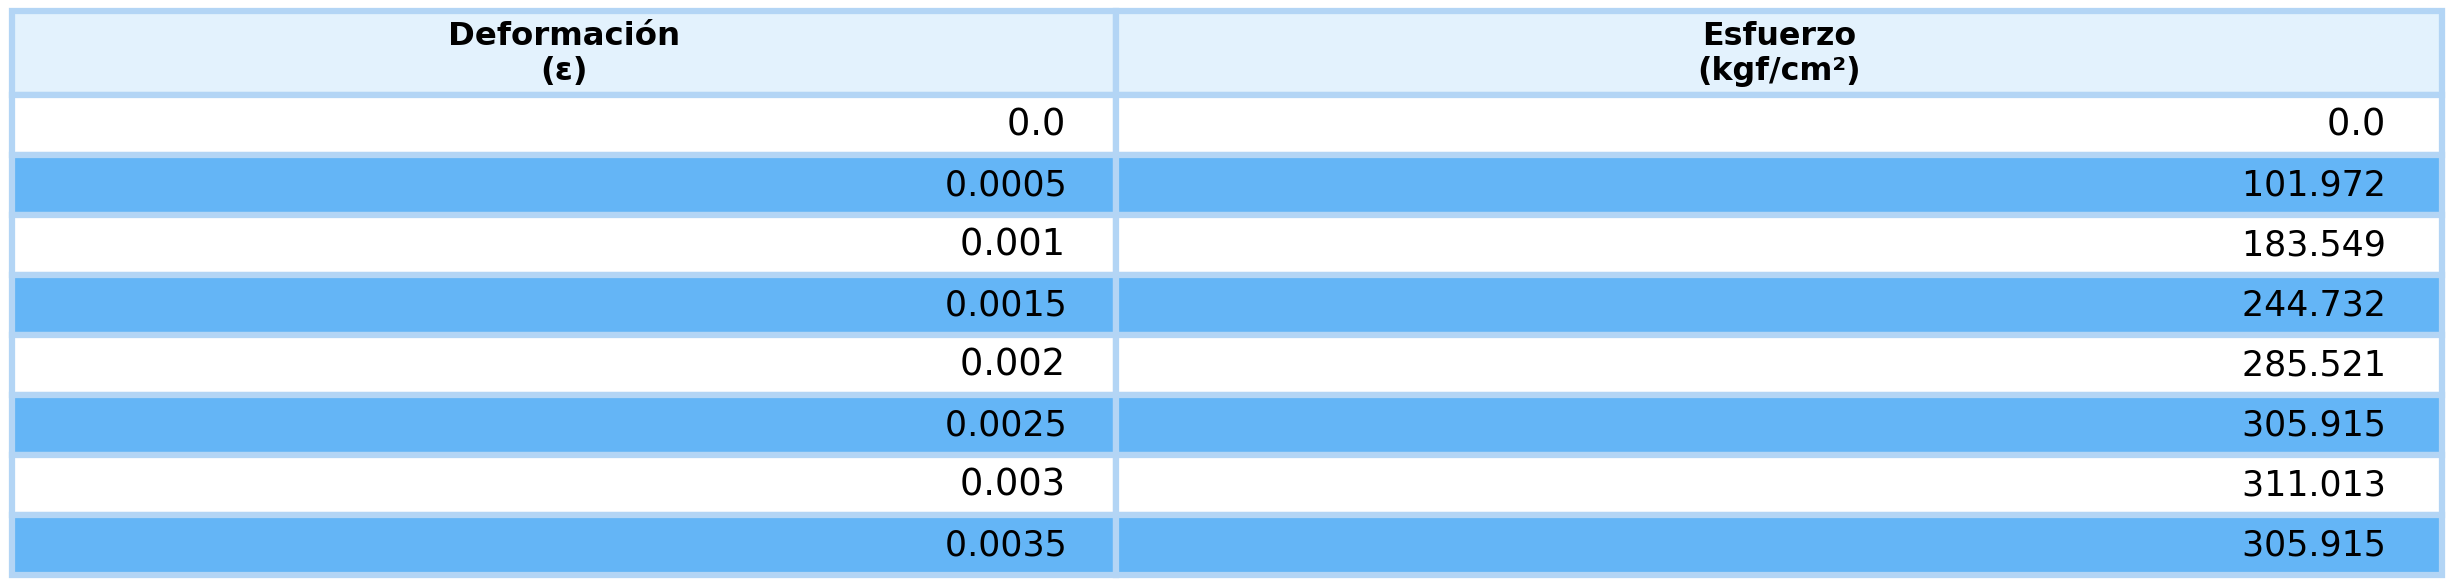

In [5]:
converted_df_stress_strain = converter.convert_table(df_stress_strain, target_system = "MKS")
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a MKS" , show_figure=True)

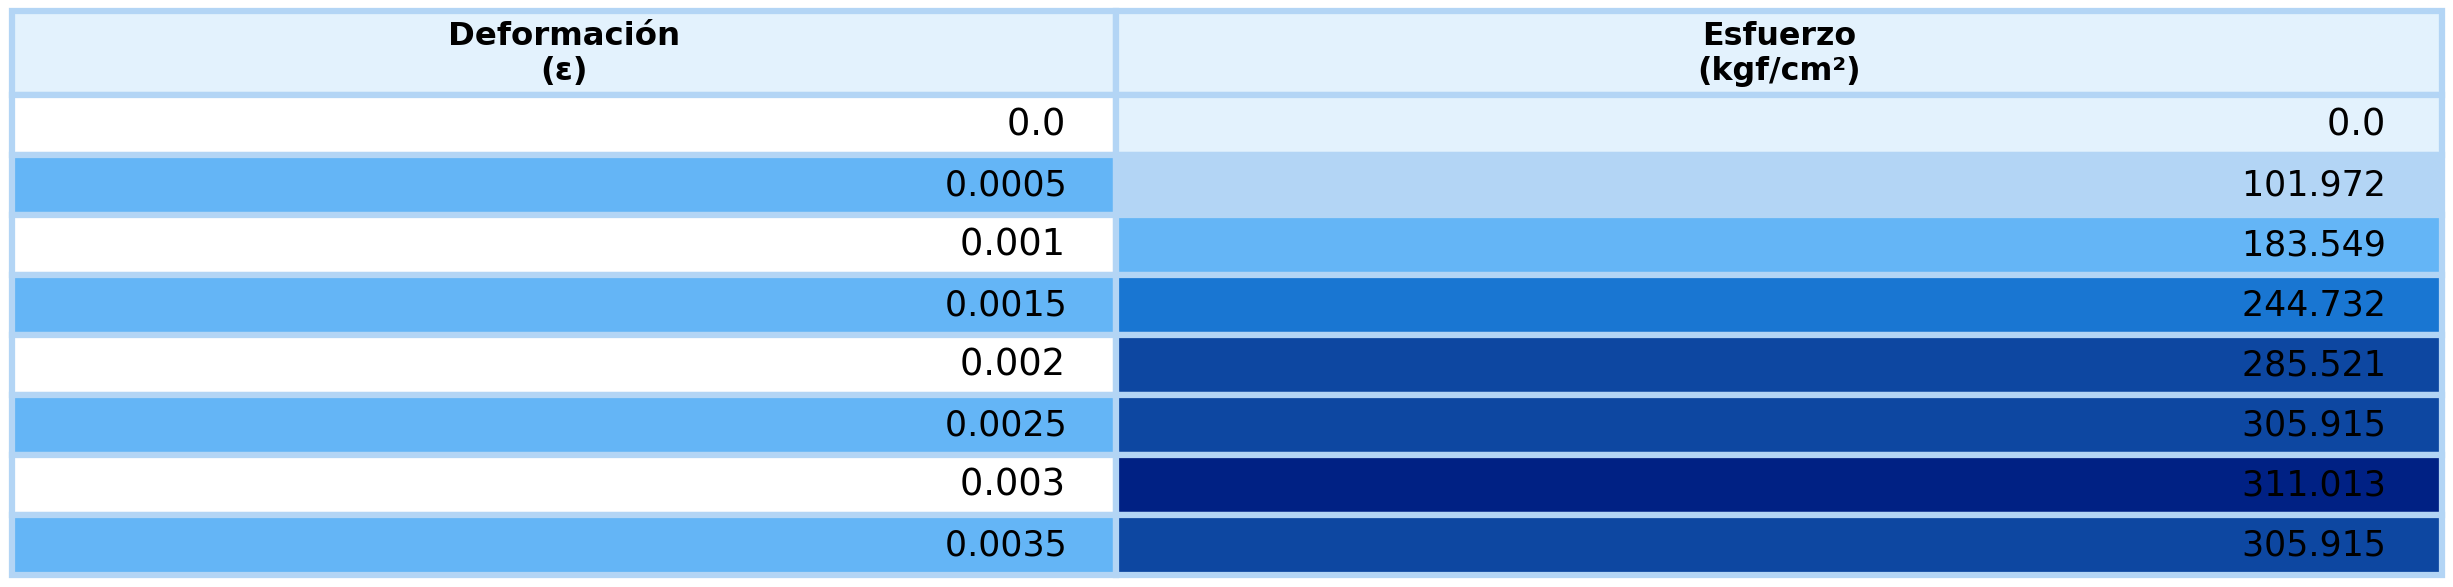

In [6]:
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a MKS" , show_figure=True, highlight_columns="Esfuerzo")

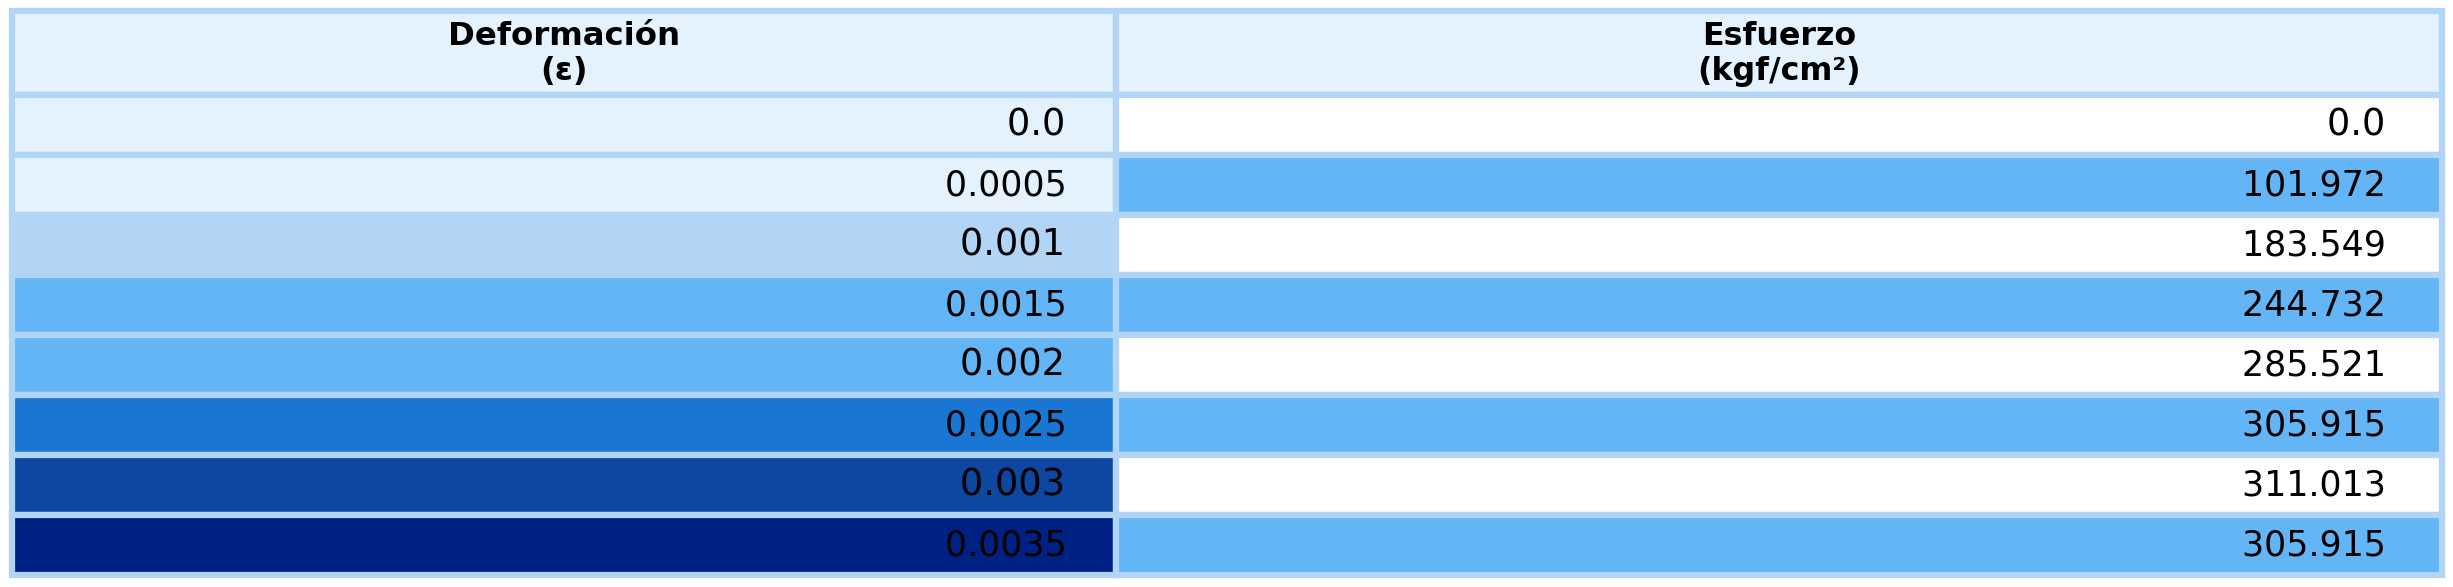

In [7]:
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a MKS" , show_figure=True, highlight_columns="deformación")

In [8]:
writer.add_h1("Conversor directa de gráficos matplotlib")

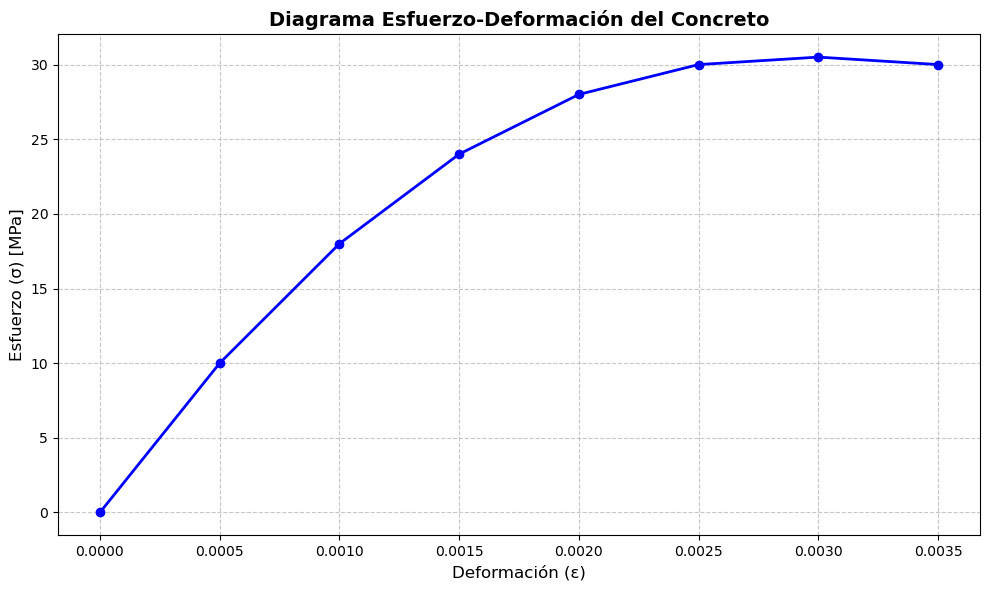

In [9]:
# Crear gráfico esfuerzo-deformación
fig = plt.figure(figsize=(10, 6))
plt.plot(df_stress_strain['Deformación (ε)'], df_stress_strain['Esfuerzo (σ) [MPa]'], 
         marker='o', linewidth=2, markersize=6, color='blue')
plt.xlabel('Deformación (ε)', fontsize=12)
plt.ylabel('Esfuerzo (σ) [MPa]', fontsize=12)
plt.title('Diagrama Esfuerzo-Deformación del Concreto', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

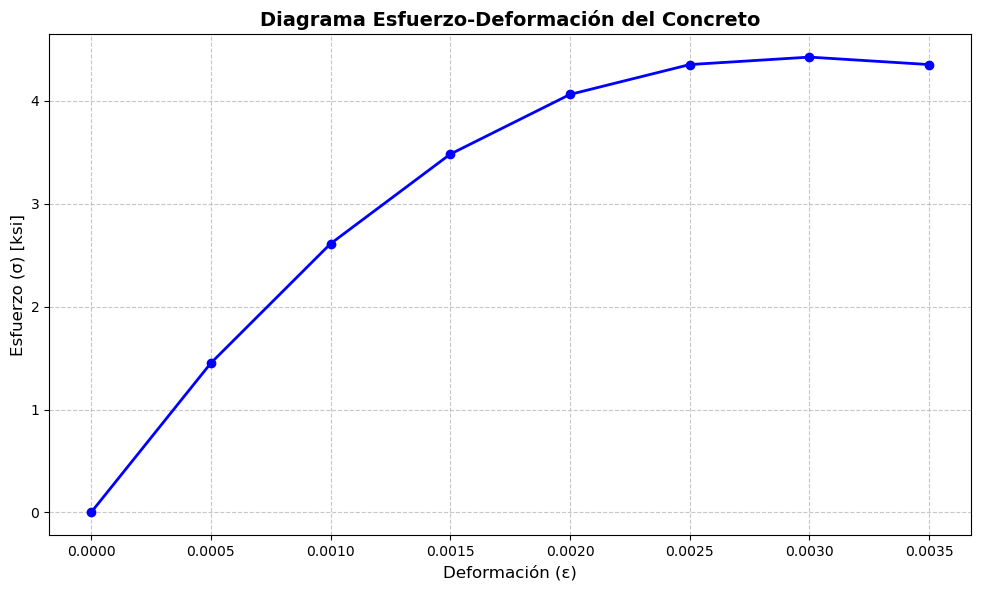

In [10]:
fig_converted_imperial = converter.convert_plot(fig, target_system = "Imperial", show_figure=False)
writer.add_plot(fig_converted_imperial)

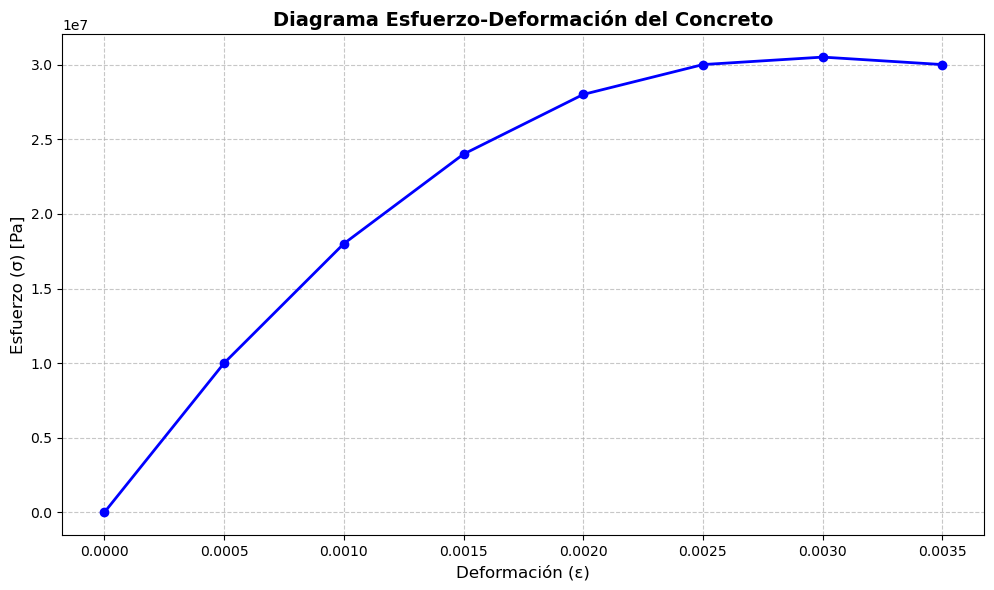

In [11]:
fig_converted_si = converter.convert_plot(fig, target_system = "SI", show_figure=False)
writer.add_plot(fig_converted_si)

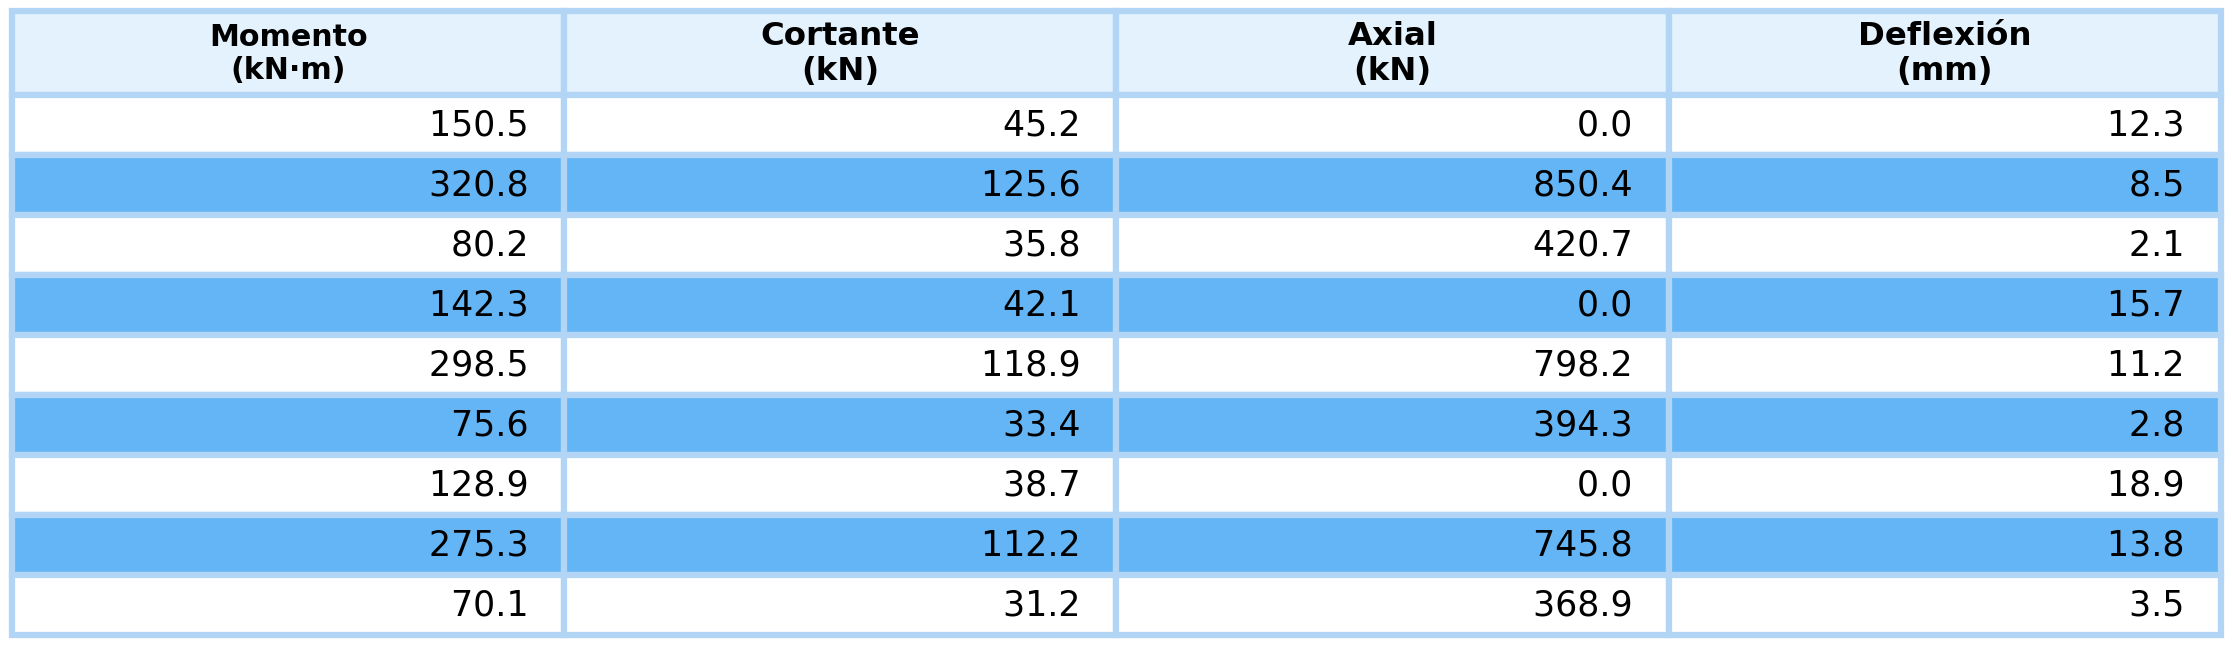

In [12]:
# Crear índices jerárquicos
pisos = ['Piso 1', 'Piso 1', 'Piso 1', 'Piso 2', 'Piso 2', 'Piso 2', 'Piso 3', 'Piso 3', 'Piso 3']
elementos = ['Viga', 'Columna', 'Muro', 'Viga', 'Columna', 'Muro', 'Viga', 'Columna', 'Muro']

# Crear multi-índice
multi_index = pd.MultiIndex.from_arrays([pisos, elementos], names=['Piso', 'Elemento'])

# Datos estructurales
data = {
    'Momento [kN·m]': [150.5, 320.8, 80.2, 142.3, 298.5, 75.6, 128.9, 275.3, 70.1],
    'Cortante [kN]': [45.2, 125.6, 35.8, 42.1, 118.9, 33.4, 38.7, 112.2, 31.2],
    'Axial [kN]': [0, 850.4, 420.7, 0, 798.2, 394.3, 0, 745.8, 368.9],
    'Deflexión [mm]': [12.3, 8.5, 2.1, 15.7, 11.2, 2.8, 18.9, 13.8, 3.5]
}

# Crear DataFrame con multi-índice
df_multiindex = pd.DataFrame(data, index=multi_index)

converted_df_multiindex = converter.convert_table(df_multiindex)

writer.add_table(converted_df_multiindex)

In [13]:
writer.generate(html=True, pdf=True)

{'qmd': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.qmd'),
 'pdf': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.pdf'),
 'html': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.html')}